## Saltation

**for Peter Haff**

Spindrift refers to spray on the ocean or sand on land driven by high winds. 


*Saltation* is the technical term for wind-driven sand movement producing ripples and dunes. 


The code below models a flat sandy surface with some rules for wind-driven grain motion.


A key idea here is to experiment with conditions for a grain of sand to come to rest.
What happens to its energy? Does it balance or fall?


charting...
charting...d: 3000
charting...d: 6000
charting...d: 9000
charting...d: 12000
charting...d: 15000
charting...d: 18000
charting...d: 21000
charting...d: 24000
charting...d: 27000
charting...d: 30000


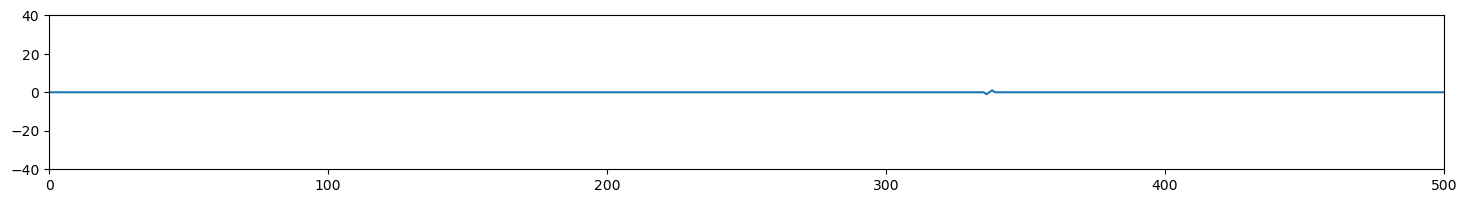

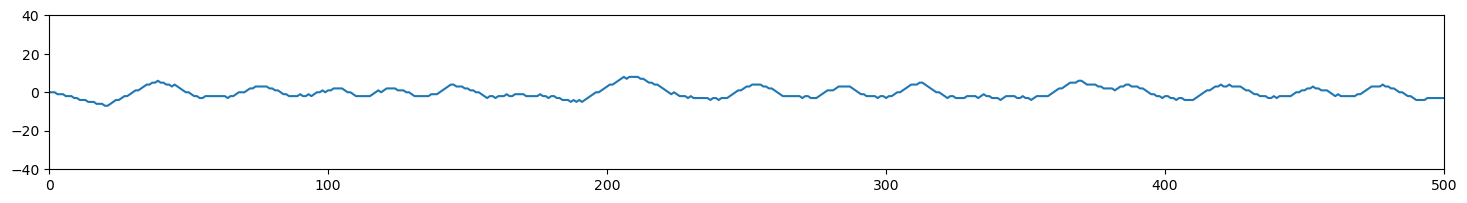

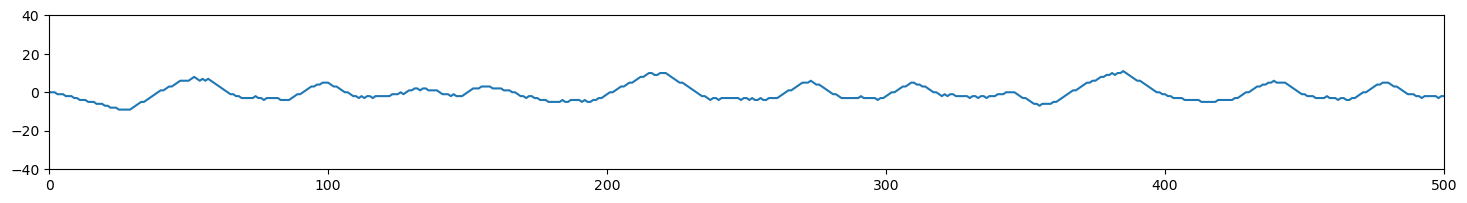

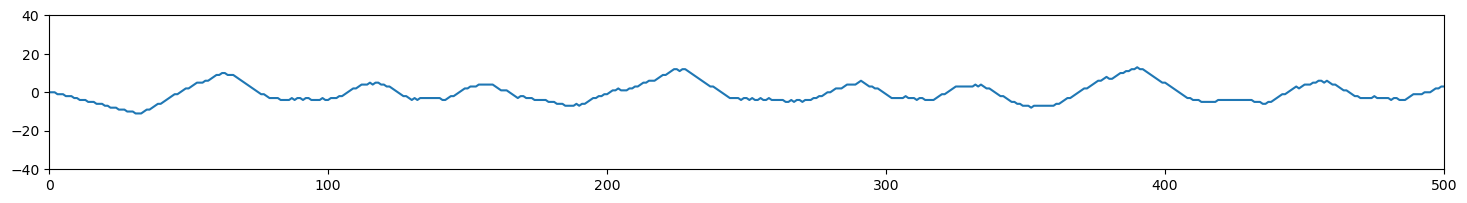

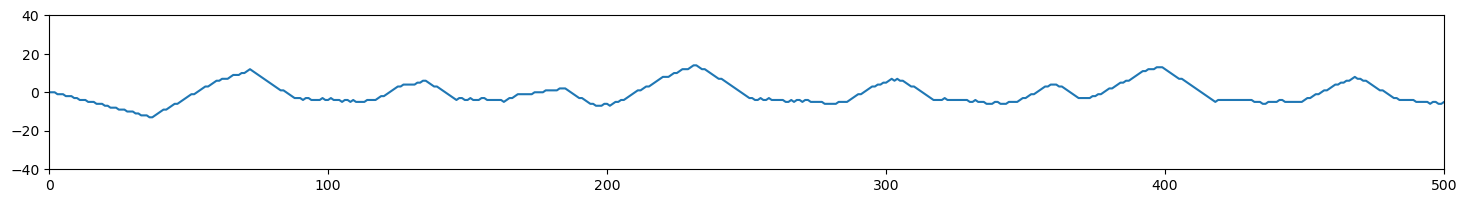

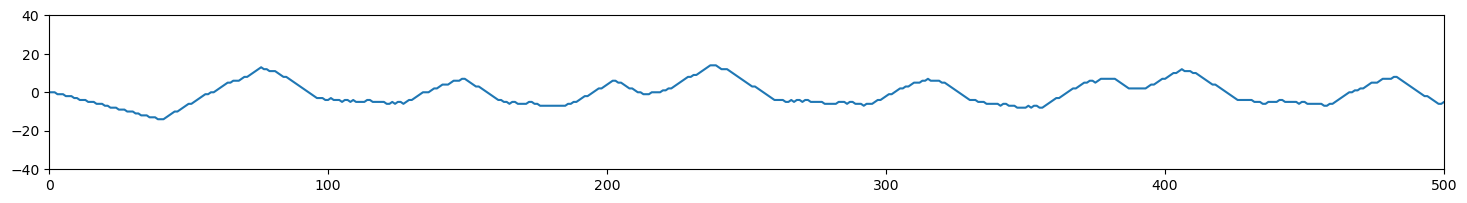

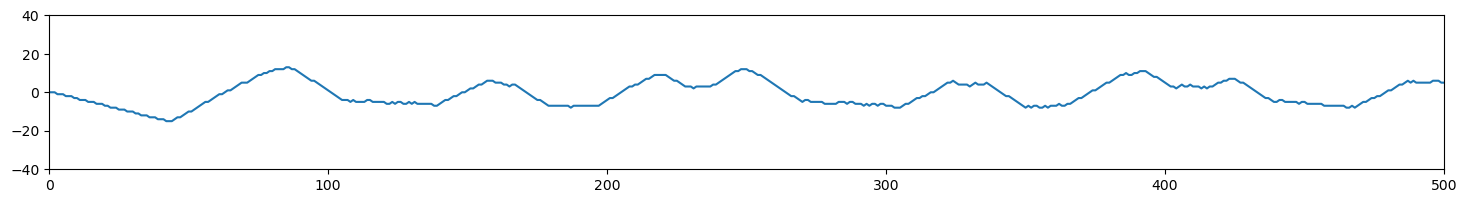

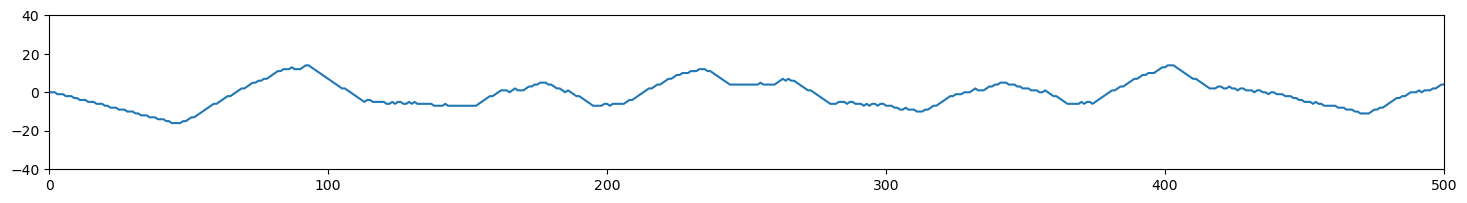

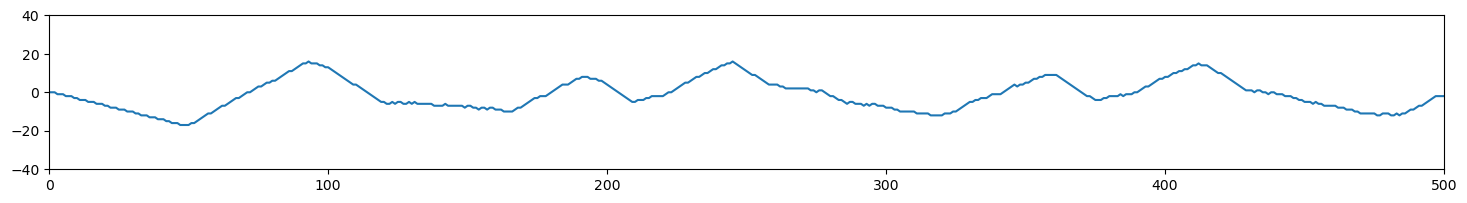

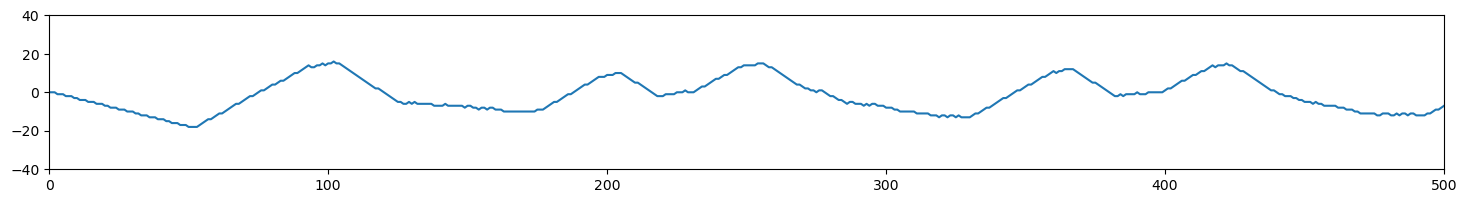

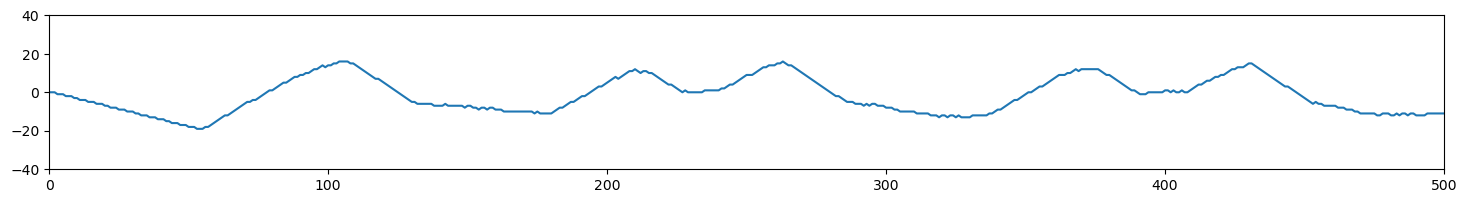

In [19]:
from math import sin, cos, tan, pi
from matplotlib import pyplot as plt
from random import randint, random

rtd = 180/pi
dtr = 1/rtd

full_range = 3000            # full extent of surface s[]
impact_range = 200           # horizontal initial range where the incident grain may impact

rest_bin_min = 1
rest_bin_max = 8

# ignore for now: impact_count_max = 1

impact_height = 60
descent_angle = 20

angle_of_repose = 34
angle_of_repose_rads = angle_of_repose * dtr

n_fix_repose = 5


# To accommodate angle of repose one could use code like this:
#
# max_z = tan(angle_of_repose_rads)
#
# However this implies rebuilding the horizontal resolution of the surface s[]
# in relation to grain size. At the moment these are 1:1. A reasonable end result
# follows from a max of 2 grains. Modifying this to 3 is instructive.

max_z = 2
min_z = -max_z


descent_angle_rads = descent_angle * dtr
descent_per_bin = 1 * tan(descent_angle_rads)
arrival_upper_limit = impact_range * tan(descent_angle_rads)

s = [0]*full_range

nsaltations = 0

def fix_repose(s):
    for i in range(1):
        n = len(s)
        for j in range(n-1):
            if s[j] - s[j+1] >= max_z:
                s[j]   -= 1
                s[j+1] += 1
            if s[j] - s[j+1] <= min_z:
                s[j]   += 1
                s[j+1] -= 1
    return s

def UpdateDuneChart(s):
    domain_list = list(range(len(s)))
    fig,ax = plt.subplots(figsize=(18,2))
    ax.plot(domain_list,s)
    ax.set(ylim = (-40, 40), xlim = (0, 500))
    # fig.show()
    return

nsaltations = 0

while True:
    
    # this loop propagates a single incident grain of sand across surface s[],
    # modifying this surface by a series of consecutive impacts. 
    # A grain strike on the surface dislodges a new grain to become airborne and
    # takes its place. The incident grain comes to rest a short distance downwind 
    # from the impact point.
    # 
    # The angle of repose is enforced by a post facto scan of the surface. If the
    # slope is too steep the grains are adjusted to try and mitigate. A more advanced
    # version of this code would track the distribution and magnitude of these
    # restorations.
    
    z0 = randint(1, int(arrival_upper_limit))
    x0 = 0
    z = z0
    x = x0
    
    while x < full_range-1:
        x += 1
        z -= descent_per_bin
        
        # descending grain impacts surface s[]
        if s[x] >= z:
            s[x] -= 1          # new grain excavated
            
            # the incident grain comes to rest near but downwind of where it impacted
            come_to_rest = randint(rest_bin_min, rest_bin_max)
            if x + come_to_rest < full_range: s[x + come_to_rest] += 1
            
            # the new grain inherits the old grains state with the addition of a vertical step.
            # More realistic models should be available: Saltation trajectories. For example YouTube 
            # videos show that the bulk of surface grains creep forward in very small increments 
            # as they are bombarded by incident saltating grains and/or happen to catch wind pressure. 
            z += impact_height

            
    # use a simple restoration scan N times to adjust areas that exceed 
    #   the maximum angle of repose
    for i in range(n_fix_repose): s = fix_repose(s)

    if not nsaltations % 3000: 
        print('charting...')
        UpdateDuneChart(s)
    if nsaltations >= 30000: break
    print('grains fired: ' + str(nsaltations + 1), end='\r')
    nsaltations += 1